In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [83]:
data=pd.read_csv(r"C:\Users\TANISH\OneDrive\Desktop\Machine Learning\PROJECT\Insurance LiR (P)\ML Project - Linear Regression Insurance Prediction 16955515670.csv")

In [84]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [85]:
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

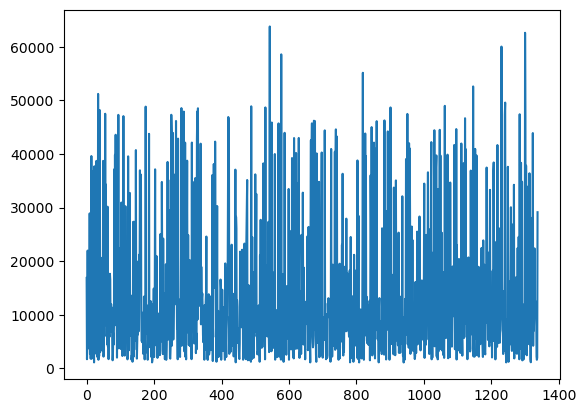

In [86]:
plt.plot(data['charges'])

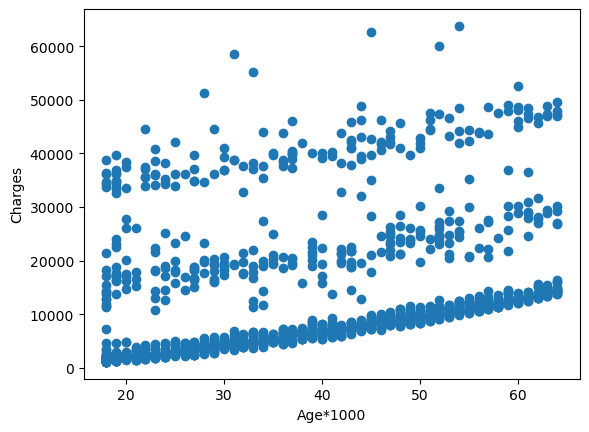

In [94]:
plt.scatter(data['age']*1000,data['charges'])
plt.xlabel('Age*1000')
plt.ylabel('Charges')
plt.gca().set_xticklabels([int(x/1000) for x in plt.gca().get_xticks()])
plt.show()

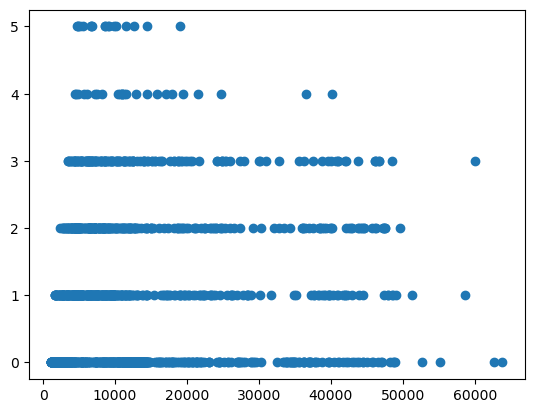

In [88]:
plt.scatter(data['charges'],data['children'])

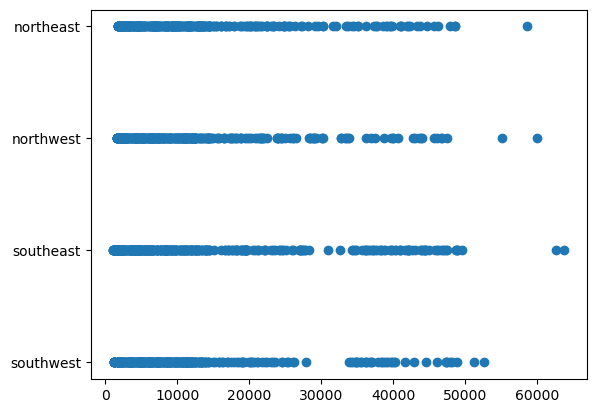

In [21]:
plt.scatter(data['charges'],data['region'])

In [22]:
data['sex'].replace(['male','female'],[1,2],inplace=True)

In [23]:
data['sex'].unique()

array([2, 1], dtype=int64)

In [24]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [25]:
data['smoker'].replace(['yes','no'],[1,0],inplace=True)

In [26]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,2,31.920,0,0,northeast,2205.98080
1335,18,2,36.850,0,0,southeast,1629.83350
1336,21,2,25.800,0,0,southwest,2007.94500


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
enc=LabelEncoder()

In [29]:
data['region']=enc.fit_transform(data['region'])

In [30]:
data['region'].unique()

array([3, 2, 1, 0])

In [31]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,2,31.920,0,0,0,2205.98080
1335,18,2,36.850,0,0,2,1629.83350
1336,21,2,25.800,0,0,3,2007.94500


In [32]:
x=data.drop('charges',axis=1)

In [33]:
y=data['charges']

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model=LinearRegression()

In [38]:
model.fit(x,y)

LinearRegression()

In [39]:
model.score(x,y)

0.7507372027994939

In [44]:
data['Predict_charges']=model.predict(x)

In [45]:
data

,age,sex,bmi,children,smoker,region,charges,Predict_charges
0,19,2,27.900,0,1,3,16884.92400,25098.945420
1,18,1,33.770,1,0,2,1725.55230,3743.687269
2,28,1,33.000,3,0,2,4449.46200,6965.886843
3,33,1,22.705,0,0,1,21984.47061,3979.933879
4,32,1,28.880,0,0,1,3866.85520,5657.223480
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,12276.818498
1334,18,2,31.920,0,0,0,2205.98080,3373.142521
1335,18,2,36.850,0,0,2,1629.83350,4316.962443
1336,21,2,25.800,0,0,3,2007.94500,1326.089679


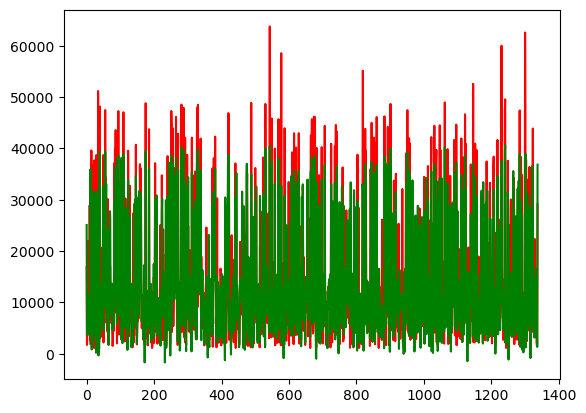

In [52]:
plt.plot(data['charges'],'r')
plt.plot(data['Predict_charges'],'g')
plt.show()

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=9)

In [56]:
model.fit(x_train,y_train)

LinearRegression()

In [57]:
model.score(x_train,y_train)

0.7440253259062534

In [58]:
model.score(x_test,y_test)

0.7778683760574732

In [59]:
from sklearn.linear_model import Lasso,Ridge

In [60]:
model1=Lasso(100)

In [61]:
model1.fit(x_train,y_train)

Lasso(alpha=100)

In [62]:
model1.score(x_train,y_train)

0.7435073518381559

In [63]:
model2=Ridge(1.5)

In [64]:
model2.fit(x_train,y_train)

Ridge(alpha=1.5)

In [65]:
model2.score(x_train,y_train)

0.7439808824976479

In [71]:
y2=data['Predict_charges']

In [72]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [73]:
mean_absolute_error(y,y2)

4156.76110754709

In [74]:
mean_squared_error(y,y2)

36551293.240906015

In [76]:
(mean_squared_error(y,y2))**(1/2)

6045.766555277008

In [77]:
np.sqrt(mean_squared_error(y,y2))

6045.766555277008